# Lesson 5: Infinite Row of Vortices

## Superposition of many vortices:

In [1]:
# imports
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# vortex class definition
class Vortex:
    """
    class to represent a vortex for numerical aerodynamic analysis
    
    
    Attributes
    ----------
    strength: float
        strength of the vortex
    x: float
        x-coordinate of the vortex
    y: float
        y-coordinate of the vortex
        
    
    Methods
    -------
    velocity(X, Y)
    stream_function(X, Y)
    
    
    Example
    -------
    v = Vortex(5.0, 0.0, 0.0)
        -- creates a vortex with strength 5 and location (0,0)
    """
    
    def __init__(self, strength, x, y):
        """
        typical object instance creation
        
        
        Parameters
        ----------
        strength: float
            strength of the vortex
        x: float
            x-coordinate of the vortex
        y: float
            y-coordinate of the vortex
            
        Returns
        -------
        none
        """
        
        self.strength = strength
        self.x = x
        self.y = y
        
    def velocity(self, X, Y):
        """
        returns 2D numpy arrays of x and y velocity components
        
        Parameters
        ----------
        X: 2D numpy array of floats, as created by numpy.meshgrid()
            x-coordinates of mesh grid
        Y: 2D numpy array of floats, as created by numpy.meshgrid()
            y-coordinates of mesh grid
        
        Returns
        -------
        u, v: 2D numpy arrays containing x and y velocity components, respectively
        """
        
        u = +self.strength/(2*math.pi)*(Y - self.y)/((X - self.x)**2 + (Y - self.y)**2)
        v = -self.strength/(2*math.pi)*(X - self.x)/((X - self.x)**2 + (Y - self.y)**2)
        
        return u, v
    
    def stream_function(self, X, Y):
        """
        returns 2D numpy array of stream function values
        
        Parameters
        ----------
        X: 2D numpy array of floats, as created by numpy.meshgrid()
            x-coordinates of mesh grid
        Y: 2D numpy array of floats, as created by numpy.meshgrid()
            y-coordinates of mesh grid
        
        Returns
        -------
        psi: 2D numpy array of floats
            stream function values
        """
        
        psi = self.strength/(4*math.pi)*np.log((X - self.x)**2 + (Y - self.y)**2)
        
        return psi

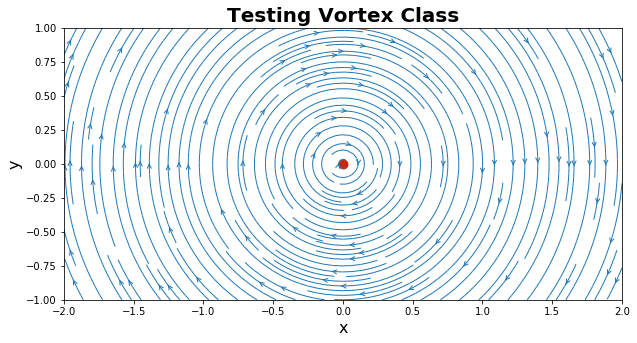

In [9]:
# quick test of Vortex class
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x,y)
vort = Vortex(5.0, 0.0, 0.0)

u_vort, v_vort = vort.velocity(X, Y)

size = 10
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Testing Vortex Class', fontsize=20, fontweight='bold')
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_vort, v_vort, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(vort.x, vort.y, color='#CD2305', s=80, marker='o');